# Import Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import joblib


In [3]:
df = pd.read_csv('../data/heart-disease.csv')
df.head(6)

,age,sex,chest-pain,bp,chol,fbs,rest-ecg,heart-rate,angina,st-depression,vessels,blood-disorder,disease
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,0,1,1


In [4]:
y = df['disease']
y.unique()

array([1, 0])

In [5]:
X = df

In [6]:
X.columns

Index(['age', 'sex', 'chest-pain', 'bp', 'chol', 'fbs', 'rest-ecg',
       'heart-rate', 'angina', 'st-depression', 'vessels', 'blood-disorder',
       'disease'],
      dtype='object')

In [7]:
def get_pearson_corr_matrix(df: pd.DataFrame) -> pd.DataFrame:
    ### BEGIN SOLUTION
    return df.corr(method="pearson")
    ### END SOLUTION

In [8]:
# Tạo correlation matrix từ hàm đã viết
corr_matrix = get_pearson_corr_matrix(X)

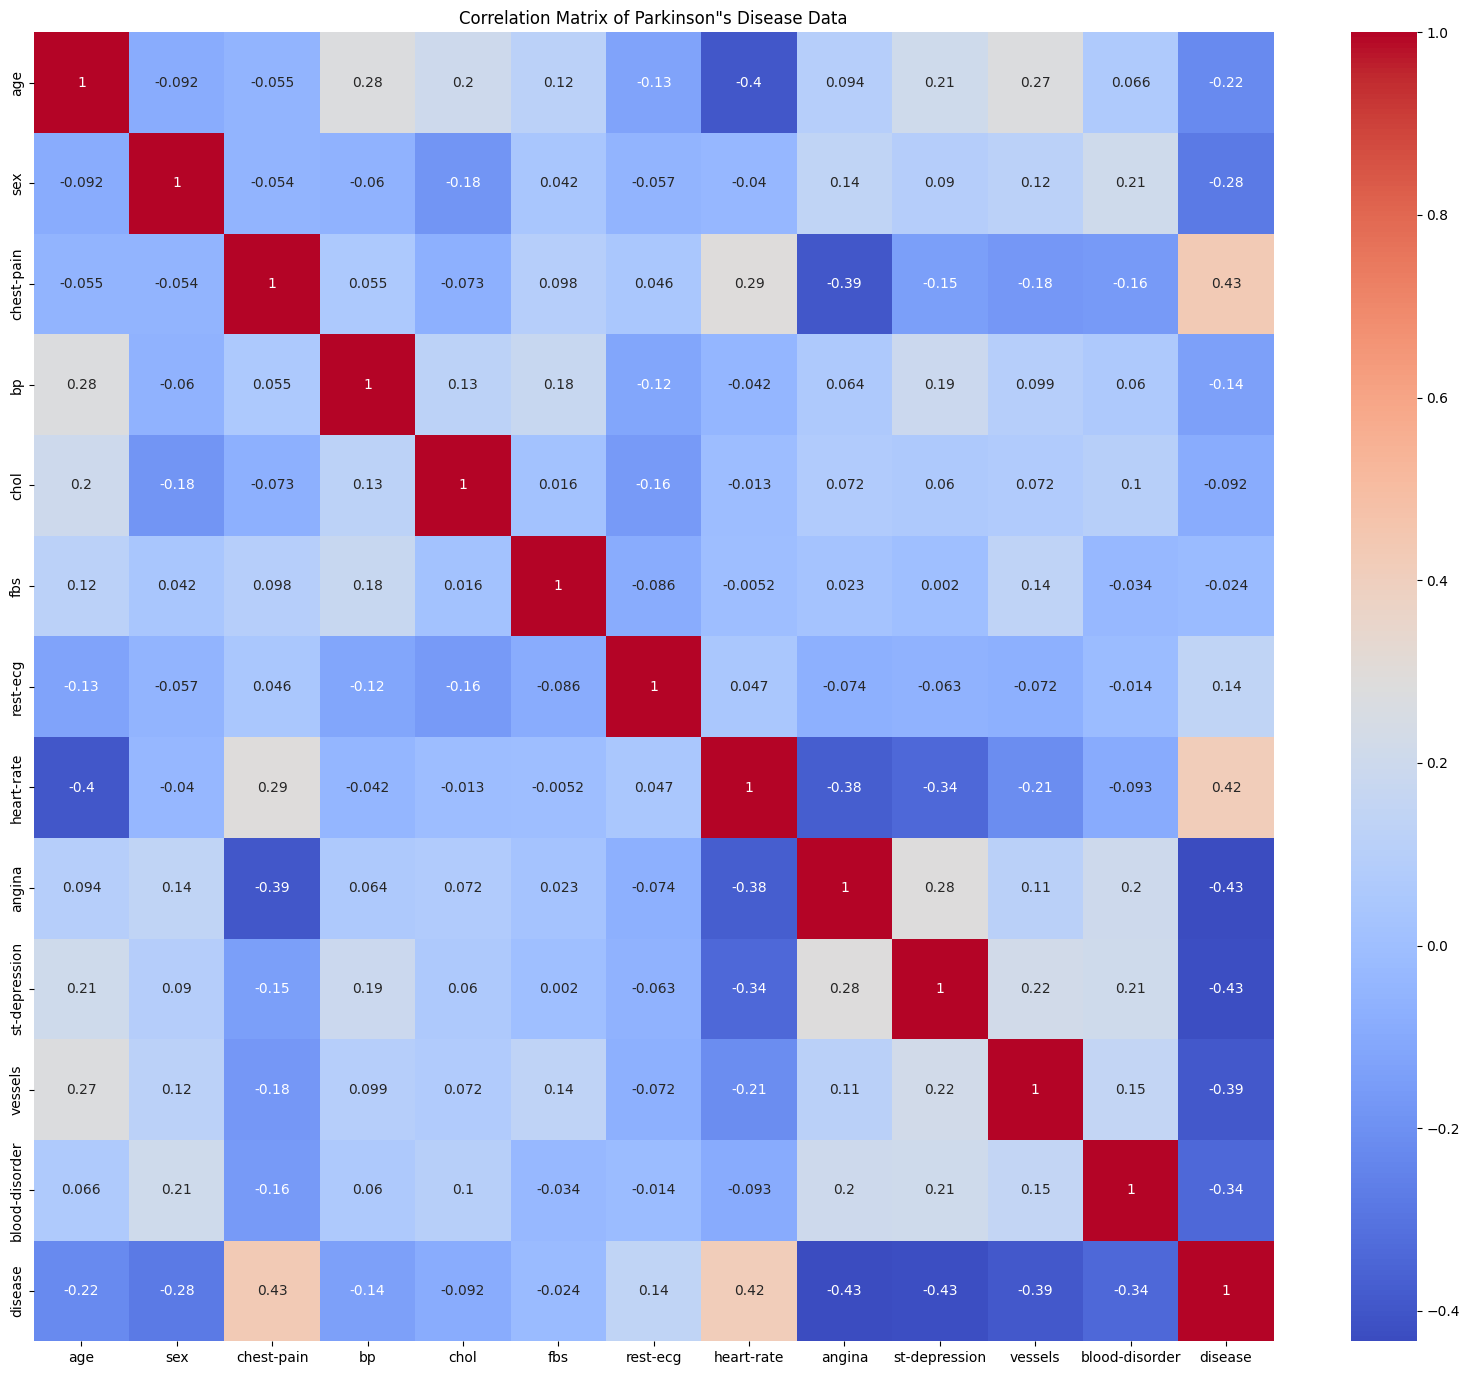

In [9]:
# Plot the correlation matrix
plt.figure(figsize=(20,17))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Parkinson"s Disease Data')
plt.show()

In [10]:
def drop_highly_correlated_features(df: pd.DataFrame, threshold: float) -> pd.DataFrame:
    ### BEGIN SOLUTION
    target_col = "disease" if "disease" in df.columns else None
    feature_cols = [col for col in df.columns if col != target_col]
    
    corr_matrix = df[feature_cols].corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    retained_cols = [col for col in df.columns if col not in to_drop]
    return df[retained_cols]
    ### END SOLUTION

In [11]:
# Khởi tạo giá trị correlation_threshold là 0.7
correlation_threshold = 0.7
# Tiến hành loại bỏ những đặc trưng
X = drop_highly_correlated_features(X, correlation_threshold)

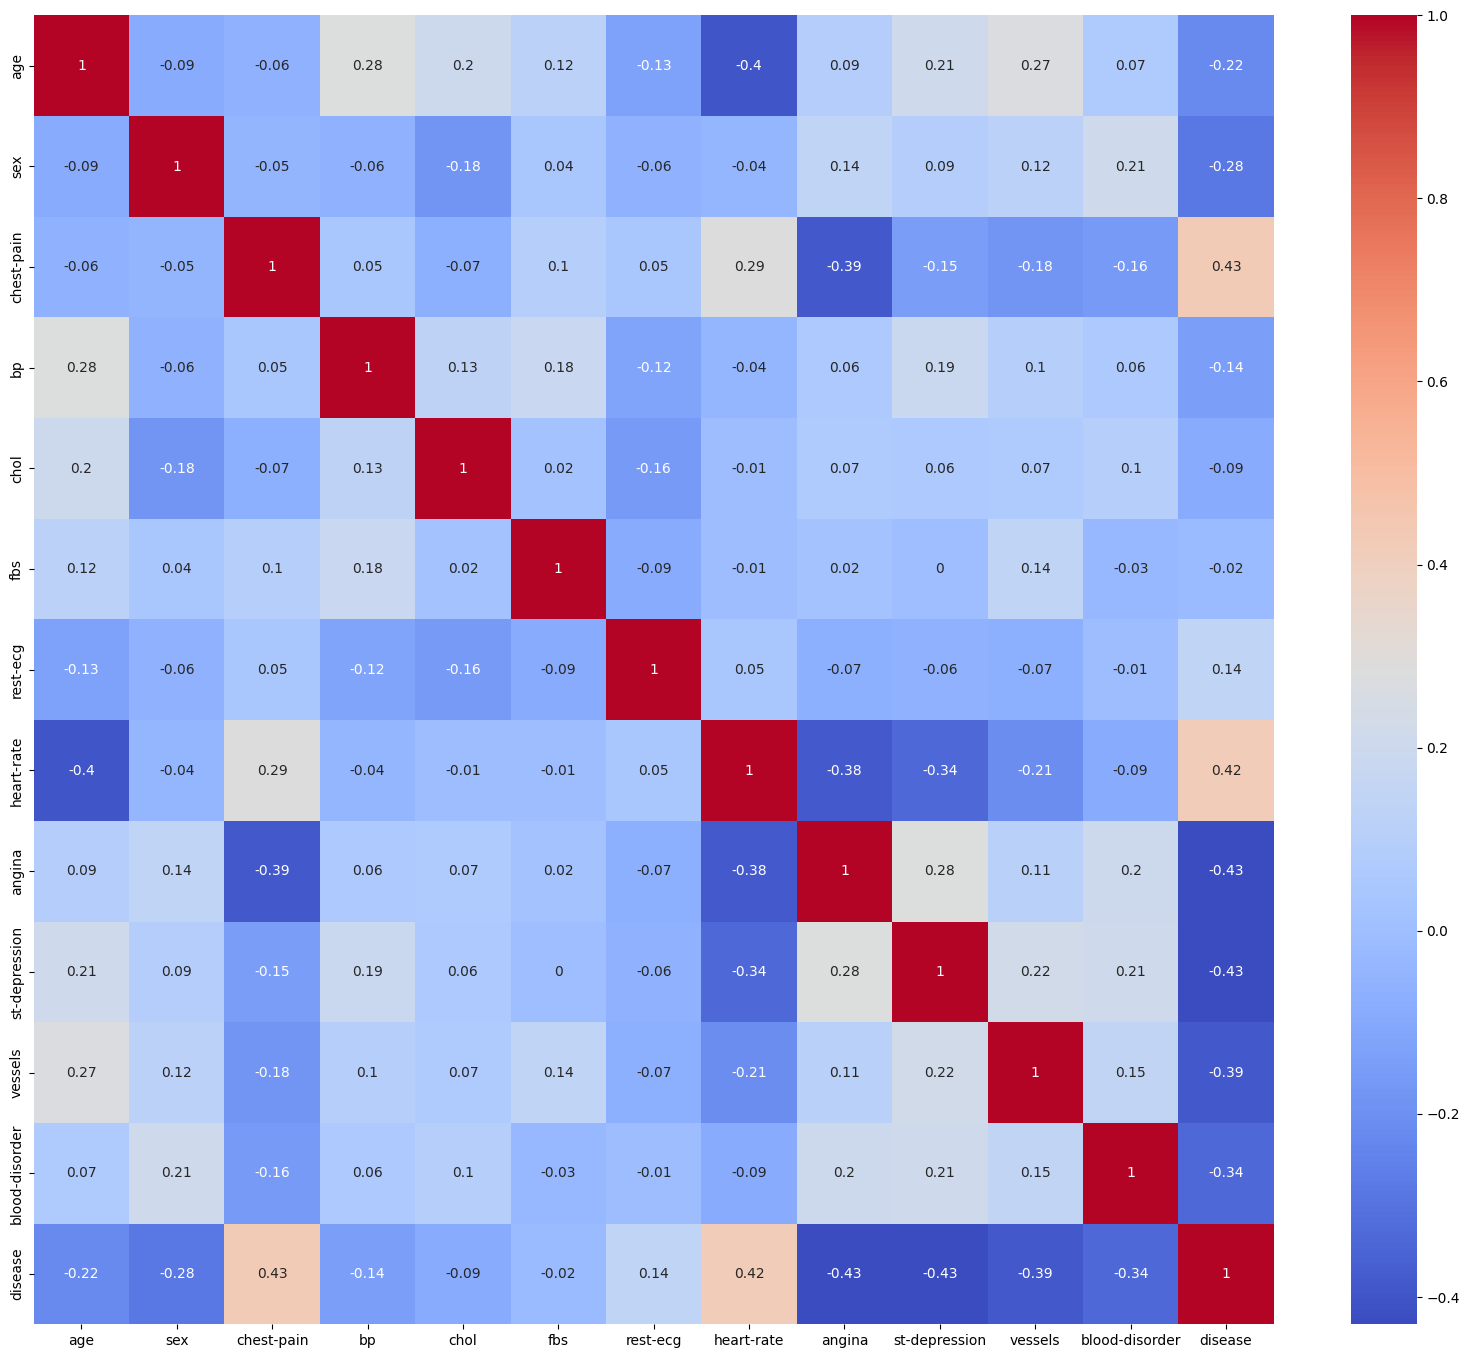

In [12]:
corr_matrix = get_pearson_corr_matrix(X)
plt.figure(figsize=(20,17))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm')
plt.show()

In [13]:
print(X.columns)
print(len(X.columns))

Index(['age', 'sex', 'chest-pain', 'bp', 'chol', 'fbs', 'rest-ecg',
       'heart-rate', 'angina', 'st-depression', 'vessels', 'blood-disorder',
       'disease'],
      dtype='object')
13


In [14]:
X.to_csv('../frontend/public/dap.csv',index=False)

In [15]:
X = pd.read_csv('../frontend/public/dap.csv')

scaler = StandardScaler()
X = scaler.fit_transform(X)

joblib.dump(scaler,'./model/scaler.pkl')
print('\nScaler saved successfully!')



Scaler saved successfully!


In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGB

In [17]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        51

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



c:\anaconda3\envs\CS114_project_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:33:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# SVM

In [19]:
model = SVC(kernel='linear',random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        51

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



# RandomForset

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        51

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



# Light GBM

In [22]:
model = lgb.LGBMClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 111, number of negative: 99
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 210, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.528571 -> initscore=0.114410
[LightGBM] [Info] Start training from score 0.114410
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

c:\anaconda3\envs\CS114_project_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
